# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [70]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

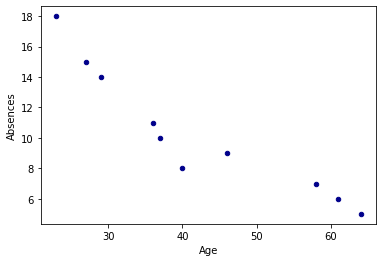

In [39]:
# your code here
df = pd.read_csv('../data/absences.csv')
df.plot.scatter(x='Age',
                      y='Absences',
                      c='DarkBlue')

In [40]:
# your comments here
'''
We can see a negative correlation between Ages and Absences.
As people get older, they have less absences'''

'\nWe can see a negative correlation between Ages and Absences.\nAs people get older, they have less absences'

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [41]:
# your code here
# y = m*x + c
def regLines(x1,x2,y1,y2):
    d1 = x2 - x1
    d2 = y2 - y1
    f = d2/d1
    g = y1 - f * x1
    
    return f,g 

#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

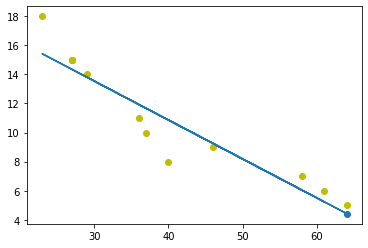

In [47]:
# your code here
x1 = 27
y1 = 15

x2 = 64
y2 = 4.4

plt.scatter([x1,x2],[y1,y2])
coef = np.polyfit(df['Age'], df['Absences'], 1)
poly1d_fn = np.poly1d(coef) 

plt.plot(df['Age'], df['Absences'], 'yo', df['Age'], poly1d_fn(x),)

In [48]:
# your comments here
'''
The regression line is negative as I though before.'''

'\nThe regression line is negative as I though before.'

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [60]:
# your code here
def covariance(a, b):
    if len(a) != len(b):
        return

    a_mean = np.mean(a)
    b_mean = np.mean(b)

    sum = 0

    for i in range(0, len(a)):
        sum += ((a[i] - a_mean) * (b[i] - b_mean))

    return sum/(len(a)-1)

def correlation(x, y):
    sX = np.std(x) 
    sY = np.std(y)
    return covariance(x,y) / (sX * sY)
    

correlation(df['Age'], df['Absences'])

-1.0361593436090013

#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [61]:
# your code here
covariance(df['Age'], df['Absences'])

-57.699999999999996

In [ ]:
# your comments here

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [ ]:
# your comments here

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [62]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [63]:
# your code here
ironbeers_df.cov()

,X,Y
X,18.857143,12.0
Y,12.000000,8.0


In [64]:
ironbeers_df.corr()

,X,Y
X,1.000000,0.977008
Y,0.977008,1.000000


In [66]:
# your comments here

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

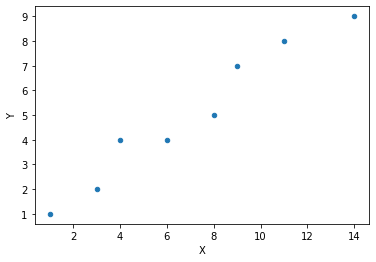

In [67]:
# your code here
ironbeers_df.plot.scatter('X','Y')

In [68]:
# your comments here
'''
As many people tell to stay at home, more people will stay there, so the slope is higly positive'''

'\nAs many people tell to stay at home, more people will stay there, so the slope is higly positive'

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

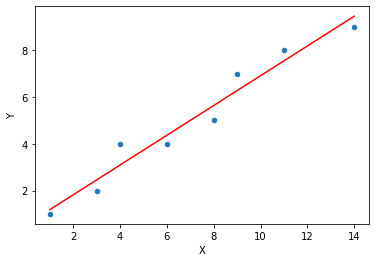

In [73]:
# your code here
linReg = LinearRegression()
linReg.fit(ironbeers_df[['X']], ironbeers_df['Y'])

ironbeers_df.plot.scatter('X','Y')
plt.plot(ironbeers_df['X'], linReg.predict(ironbeers_df[['X']]), color="red")



In [74]:
# your comments here
'''
There is a positive correlation'''

'\nThere is a positive correlation'

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [75]:
# your comments here
''' I think the free beers help to keep the people at Ironhack, but replying the exercise, we can say yes, I'm really popular :)
'''

" I think the free beers help to keep the people at Ironhack, but replying the exercise, we can say yes, I'm really popular :)\n"

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [ ]:
# your code here

#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [ ]:
# your code here

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [ ]:
# your comments here

#### 4.- Remove the points with a high error and recalculate the regression line.

In [ ]:
# your code here

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [ ]:
# your code here

In [ ]:
# your comments here